# **Khởi tạo**

**Import thư viện**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

**Xử lý dữ liệu**

In [19]:
def read_file(file_name):
    # Đọc dữ liệu từ file CSV
    data = pd.read_csv(file_name)

    # Chuyển cột 'Date' thành kiểu dữ liệu datetime và đặt làm index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Chuyển đổi các cột khác sang dạng số nếu cần thiết
    data['Price'] = data['Price'].str.replace(',', '').astype(float)
    # Tiền xử lý các cột khác nếu cần thiết

    # Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
    data.sort_index(inplace=True)

    return data

**Xây dựng mô hình**

In [20]:
def holt_winters_prediction(name, file_name, train_test_ratio=0.8, num_days_to_predict=90):
    # Đọc dữ liệu từ file CSV
    data = read_file(file_name)

    # Tính toán số lượng điểm dữ liệu cho tập train và tập test
    train_size = int(len(data) * train_test_ratio)
    test_size = len(data) - train_size

    # Tạo tập train và tập test
    train = data.iloc[:train_size]
    test = data.iloc[train_size:]

    # Sử dụng seasonal_periods cho chu kỳ tháng
    seasonal_periods = 21

    # Tạo mô hình Holt-Winters và fit với dữ liệu train
    model = ExponentialSmoothing(train['Price'], seasonal='mul', seasonal_periods=seasonal_periods)
    hw_model = model.fit()

    # Dự đoán giá trên tập test
    y_pred_test = hw_model.forecast(test_size)

    # Dự đoán giá cho n ngày tiếp theo
    y_pred_next_num_days = hw_model.forecast(num_days_to_predict)

    # Đánh giá mô hình
    rmse = np.sqrt(mean_squared_error(test['Price'], y_pred_test))
    mae = mean_absolute_error(test['Price'], y_pred_test)
    mape = mean_absolute_percentage_error(test['Price'], y_pred_test)

    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}%')

    # Trực quan hóa kết quả
    plt.figure(figsize=(14, 8))
    plt.plot(data.index[:train_size], train['Price'], color='blue', label='Train Data')
    plt.plot(data.index[train_size:], test['Price'], color='orange', label='Test Data')
    plt.plot(test.index, y_pred_test, color='green', label='Predictions on Test Data')
    
    # Plot future predictions
    future_index_90 = pd.date_range(start=data.index[-1], periods=90, freq='D')
    future_index_60 = future_index_90[:60]
    future_index_30 = future_index_90[:30]

    plt.plot(future_index_30, y_pred_next_num_days[:30], color='black', label='Next 30 days')
    plt.plot(future_index_60[30:], y_pred_next_num_days[30:60], color='purple', label='Next 60 days')
    plt.plot(future_index_90[60:], y_pred_next_num_days[60:], color='red', label='Next 90 days')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Holt-Winters {} ({})'.format(train_test_ratio, name))
    plt.legend()
    plt.show()

# **BIDV**

In [21]:
file_name = "../Dataset/BID Historical Data.csv"
name = 'BIDV'

**BIDV 7:3**

RMSE: 12147.353685172613
MAE: 10425.494048436882
MAPE: 0.243770280218003%


c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will res

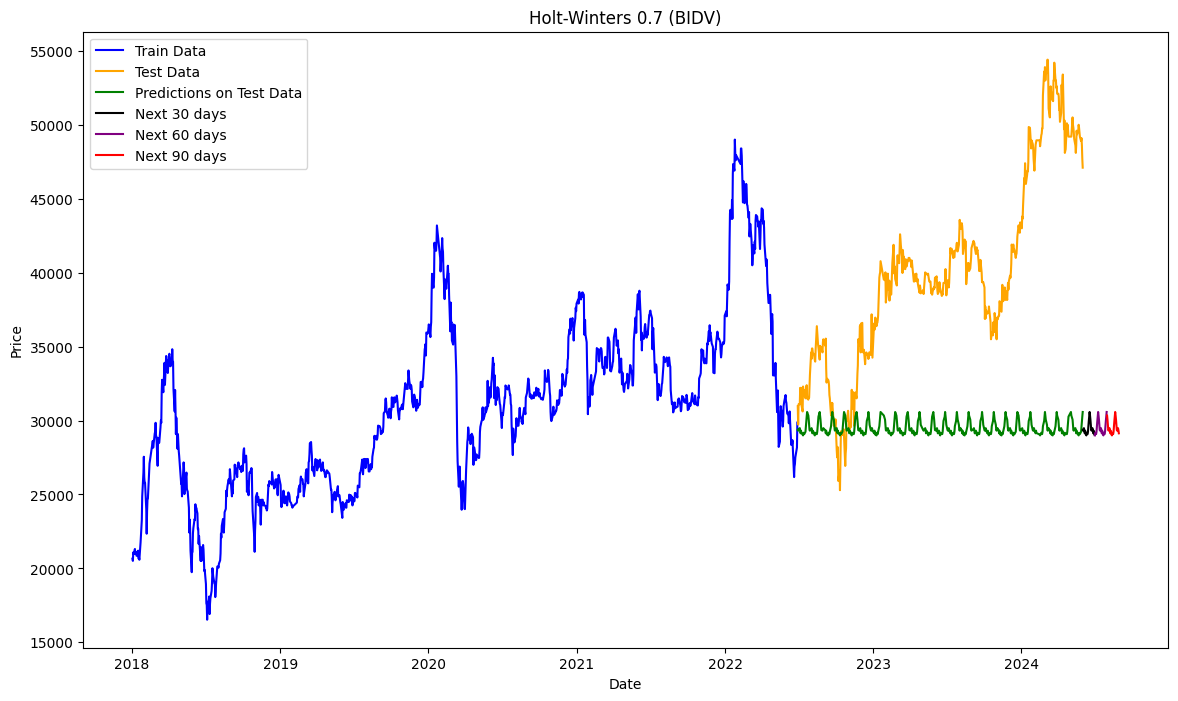

In [22]:
holt_winters_prediction(name, file_name, 0.7)

**BIDV 8:2**

c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will res

RMSE: 5442.702188323781
MAE: 4004.0397149336686
MAPE: 0.08676698769142098%


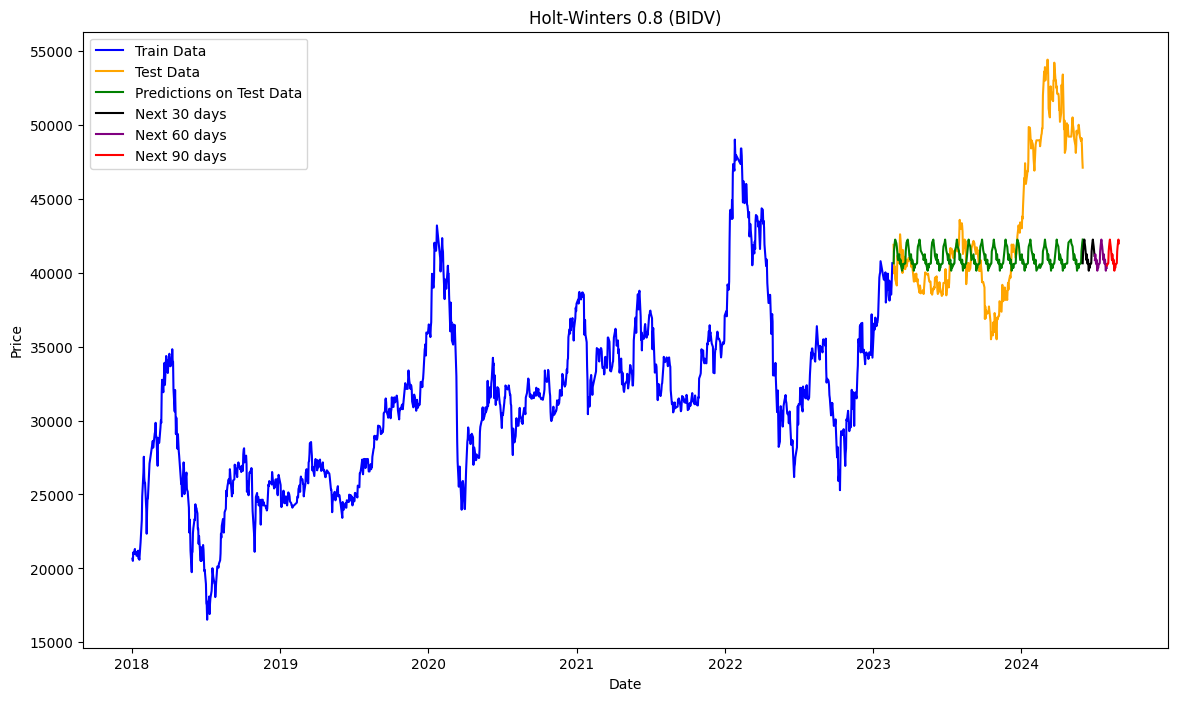

In [23]:
holt_winters_prediction(name, file_name, 0.8)

**BIDV 9:1**

c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will res

RMSE: 9974.911960106698
MAE: 8400.136045318563
MAPE: 0.17107463302483644%


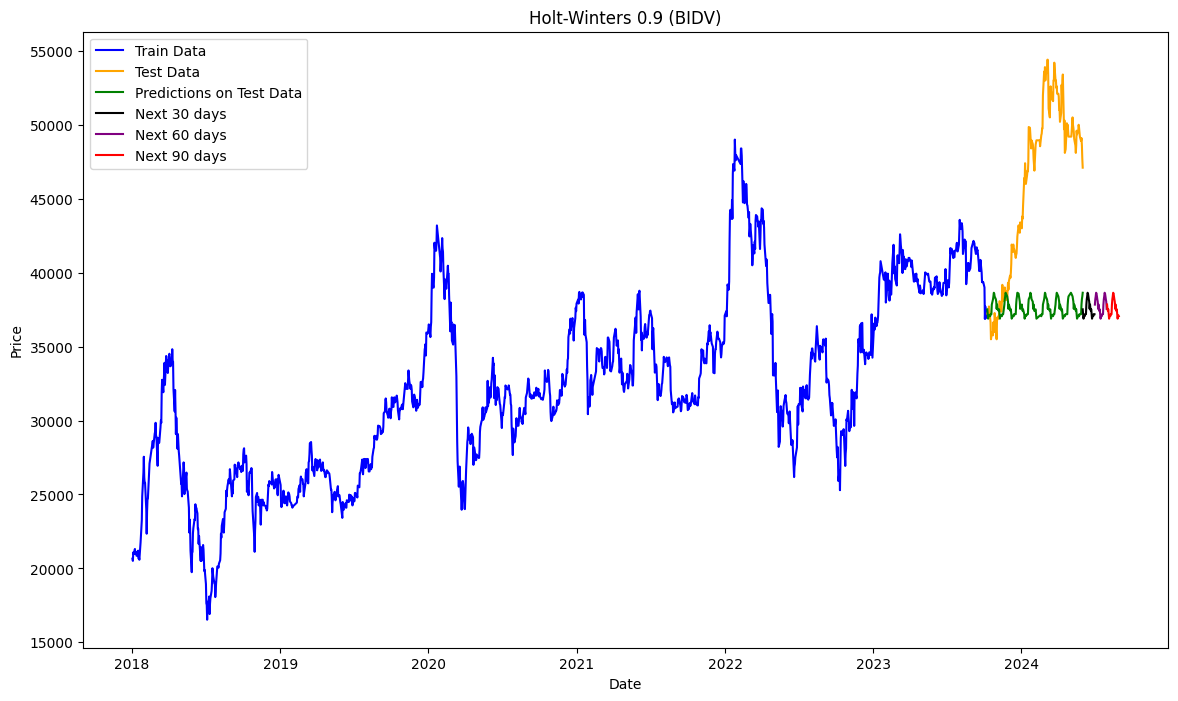

In [24]:
holt_winters_prediction(name, file_name, 0.9)

# **MBB**

In [25]:
file_name = "../Dataset/MBB Historical Data.csv"
name = 'MBB'

**MBB 7:3**

c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 3030.488661366374
MAE: 2326.9289798749505
MAPE: 0.12583932258711542%


c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `sta

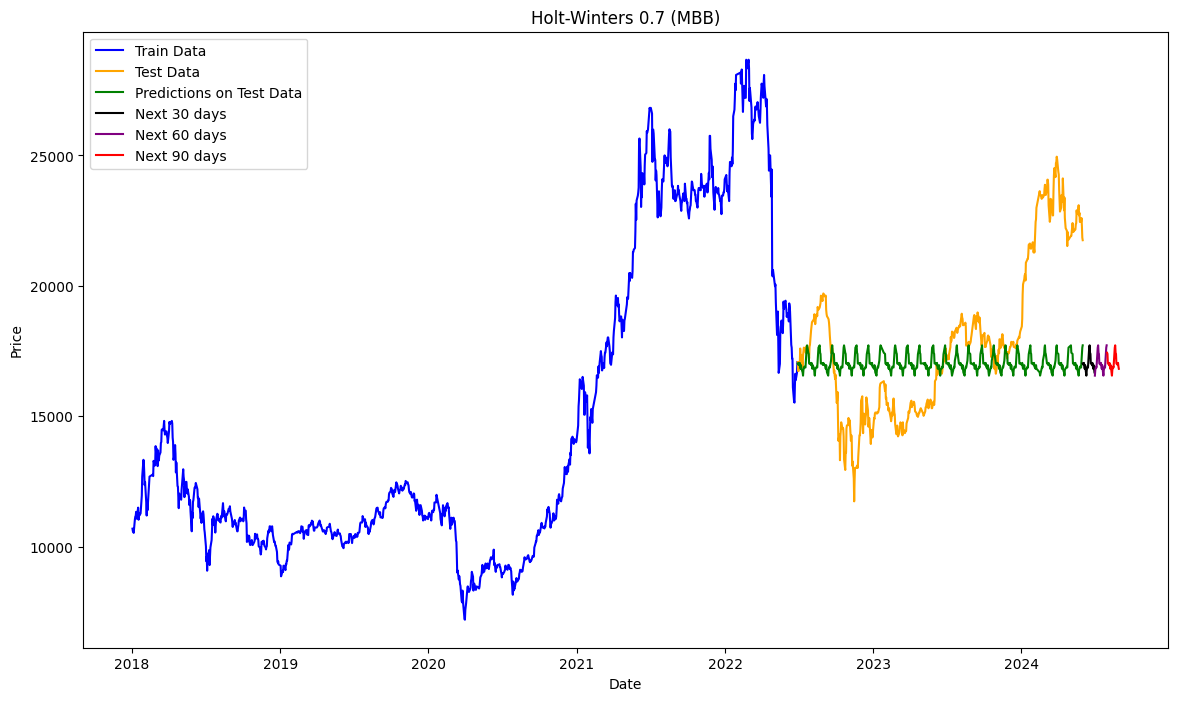

In [26]:
holt_winters_prediction(name, file_name, 0.7)

**MBB 8:2**

c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will res

RMSE: 4675.115136917383
MAE: 3715.8233838154265
MAPE: 0.18094462115632562%


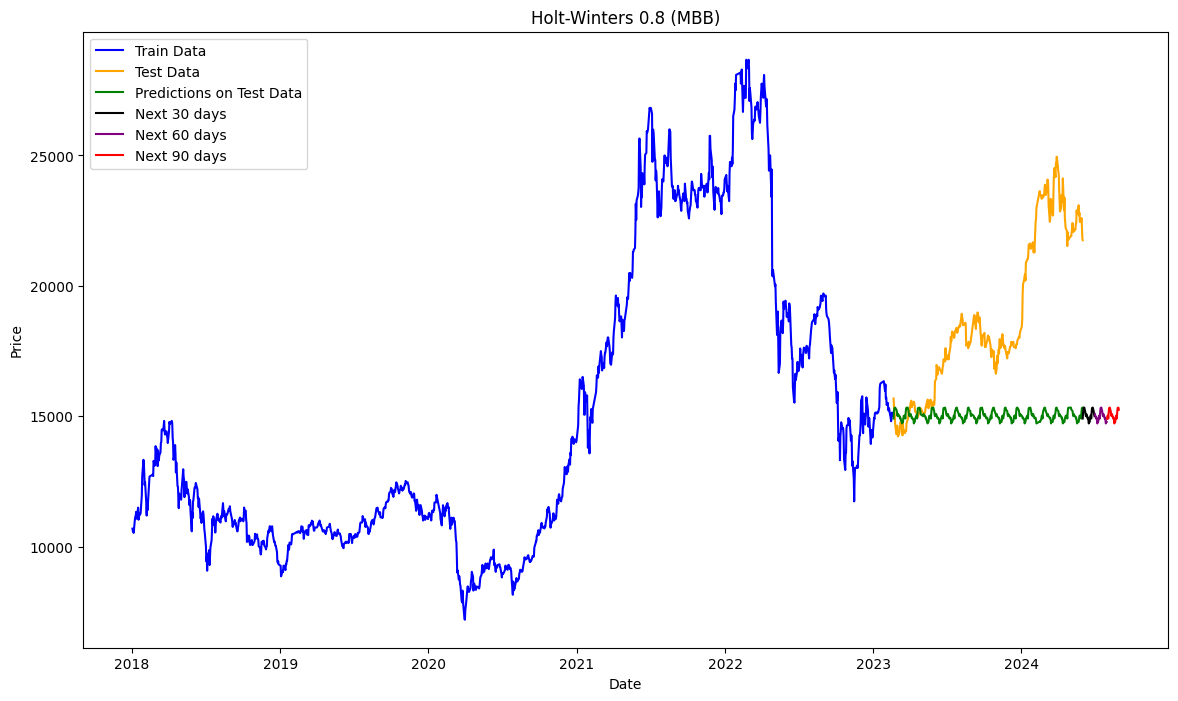

In [27]:
holt_winters_prediction(name, file_name, 0.8)

**MBB 9:1**

c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will res

RMSE: 3873.053754199345
MAE: 3092.1897160416784
MAPE: 0.13750085754421607%


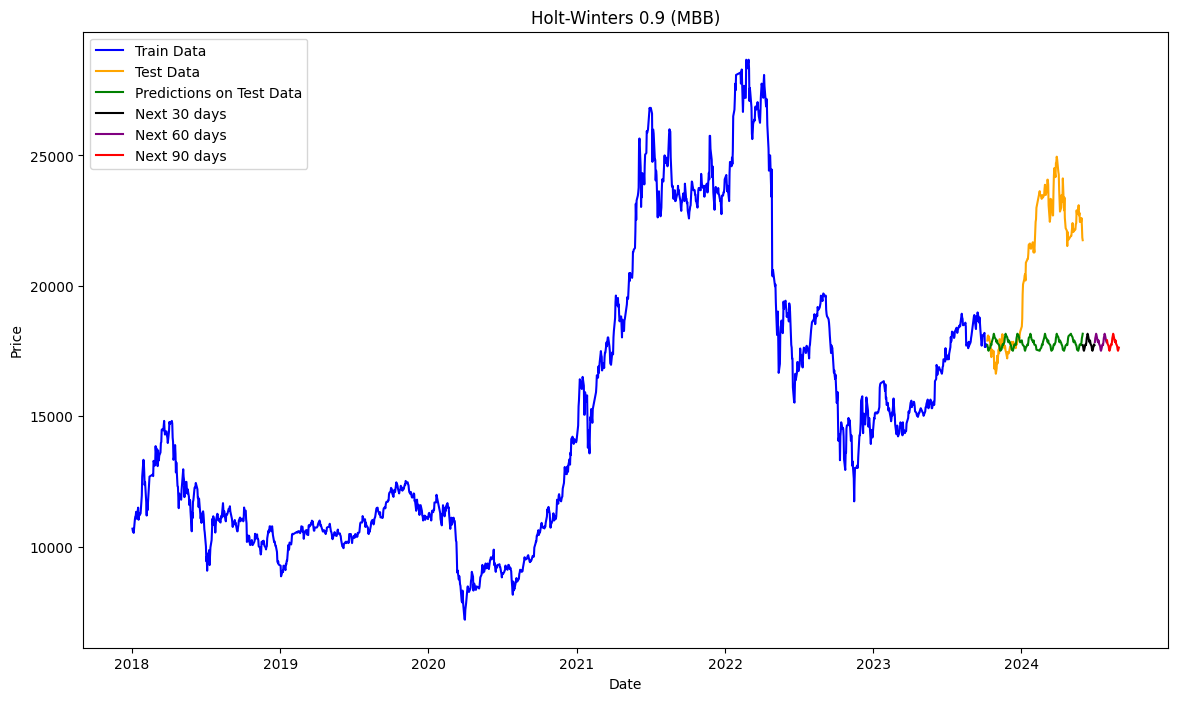

In [28]:
holt_winters_prediction(name, file_name, 0.9)

# **VCB**

In [29]:
file_name = "../Dataset/VCB Historical Data.csv"
name = 'VCB'

**VCB 7:3**

c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 19660.67290427595
MAE: 16922.622555478472
MAPE: 0.1986893598022533%


c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `sta

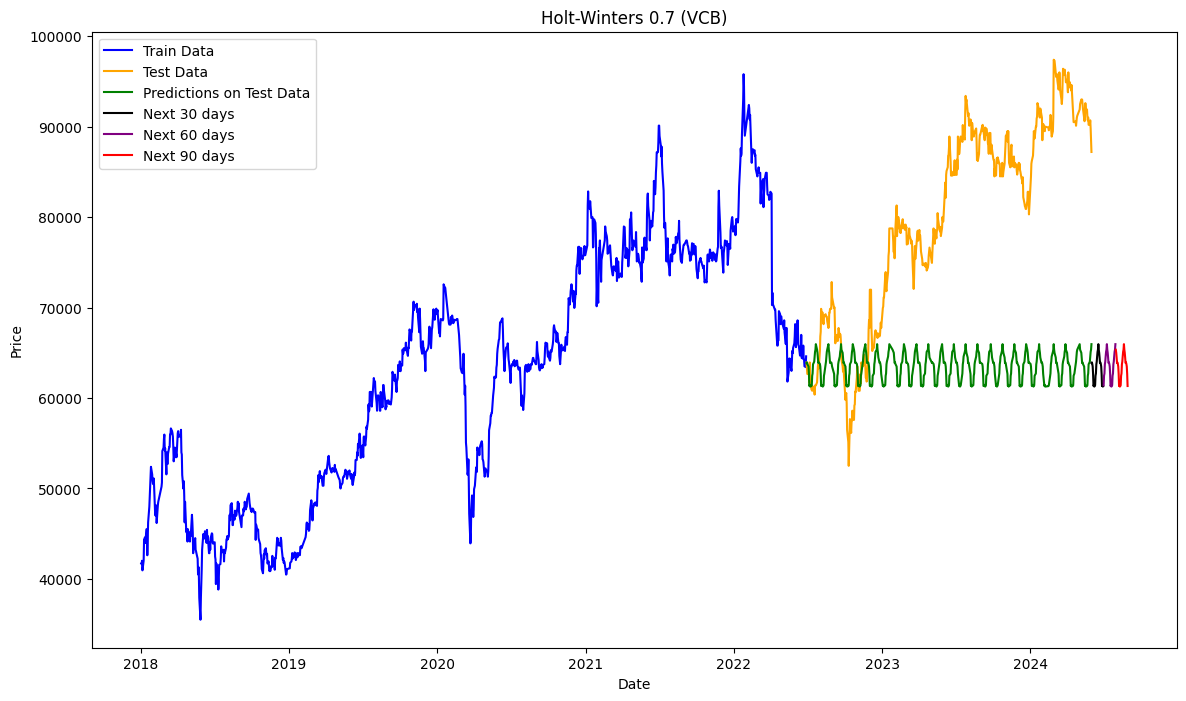

In [30]:
holt_winters_prediction(name, file_name, 0.7)

**VCB 8:2**

c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will res

RMSE: 9729.25614837887
MAE: 8419.69550006776
MAPE: 0.09450474798024545%


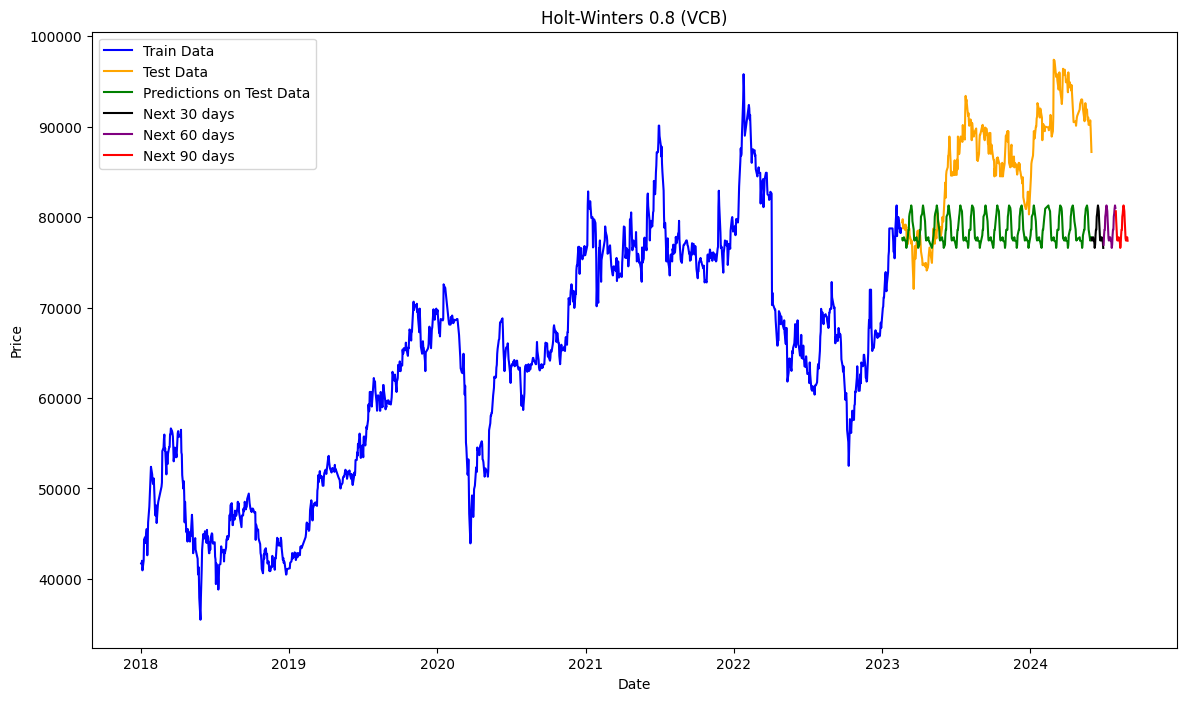

In [31]:
holt_winters_prediction(name, file_name, 0.8)

**VCB 9:1**

c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will res

RMSE: 6184.32892838993
MAE: 5317.279702483701
MAPE: 0.05843677398859011%


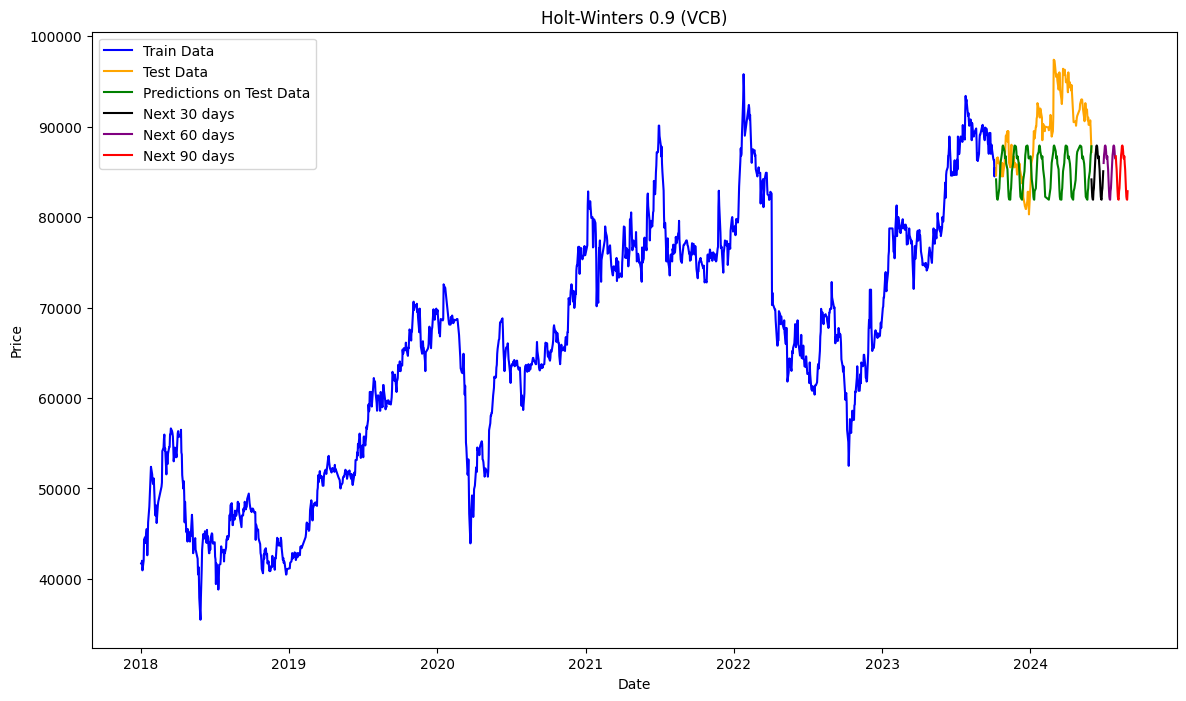

In [32]:
holt_winters_prediction(name, file_name, 0.9)